In [2]:
# Kütüphaneler
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
directory = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

classes = [i for i in os.listdir(directory) if '.' not in i]
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

In [4]:

label = []
path = []
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':
            if dir_name.split()[-1] != 'GT':
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name, filename))

data = pd.DataFrame(columns=['path','label'])
data['path'] = path
data['label'] = label

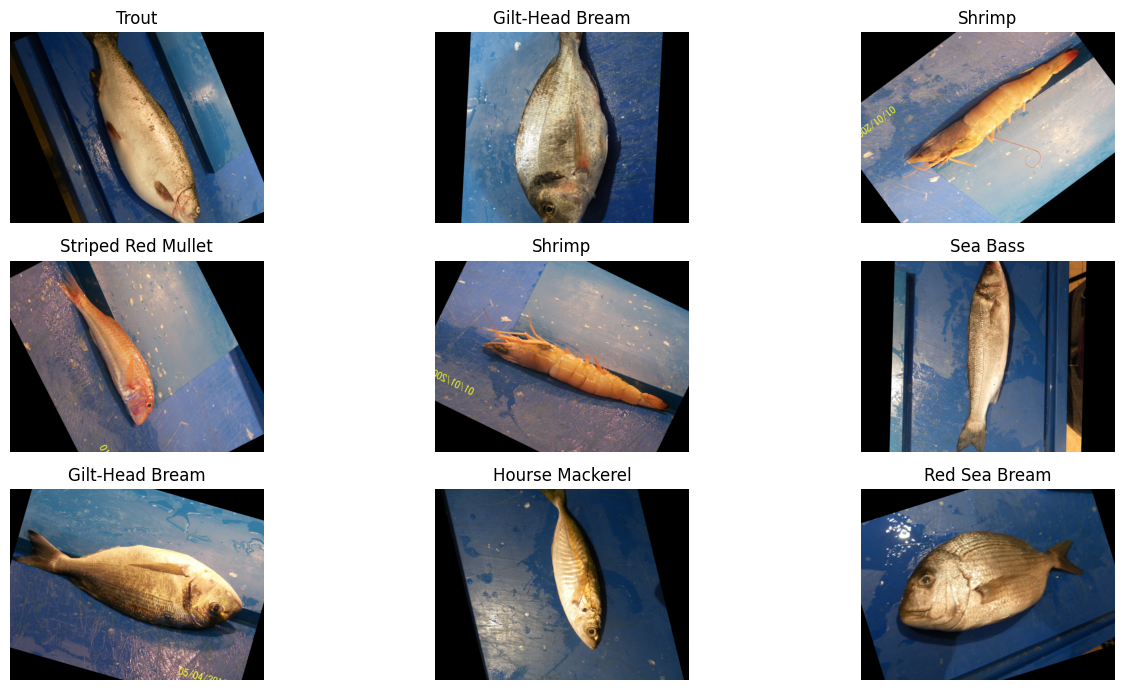

In [5]:
data = pd.DataFrame({'path': path, 'label': label})


plt.figure(figsize=(14,7))
IMG_NUM = len(path)
for i in range(9):
    rand_num = np.random.randint(0, IMG_NUM)
    plt.subplot(3, 3, i+1)
    plt.title(label[rand_num])
    current_img = plt.imread(path[rand_num])
    plt.imshow(current_img)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Görsellerin yüklenmesi
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(df, target_size=(28, 28)):
    images = []
    labels = []
    for index, row in df.iterrows():
        img = load_img(row['path'], target_size=target_size)
        img = img_to_array(img)
        img = img / 255.0  # Normalizasyon
        images.append(img)
        labels.append(row['label'])
    return np.array(images), np.array(labels)

X, y = load_images(data)

In [7]:
data['label'].value_counts()

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

In [8]:
# Eğitim ve test verisi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [9]:
# Sayısala çevirme
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [10]:
# Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [11]:
# Model oluşturma
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 3)))  # Görüntü boyutu: 28x28, 3 kanal (RGB)
model.add(Dense(128, activation='relu'))  # Gizli katman
model.add(Dropout(0.5))  # Dropout katmanı
model.add(Dense(64, activation='relu'))  # Gizli katman
model.add(Dense(len(classes), activation='softmax'))  # Çıkış katmanı (Balık sınıfları)

In [13]:
# Modelin derlenmesi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Model eğitimi
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5385 - loss: 1.2295 - val_accuracy: 0.7222 - val_loss: 0.8831
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5101 - loss: 1.2660 - val_accuracy: 0.7067 - val_loss: 0.9141
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5285 - loss: 1.2778 - val_accuracy: 0.7178 - val_loss: 0.9461
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5145 - loss: 1.2994 - val_accuracy: 0.7200 - val_loss: 0.9815
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5307 - loss: 1.2748 - val_accuracy: 0.6833 - val_loss: 0.9703
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5404 - loss: 1.2268 - val_accuracy: 0.7183 - val_loss: 0.8312
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5692 - loss: 1.1866 - val_accuracy: 0.7378 - val_loss: 0.8675
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5693 - loss: 1.1686 - val_accuracy: 0.